In [1]:
import awkward as ak
import numpy as np
import pickle
import hist
import coffea
from python.plugins import *
%matplotlib inline

# from hist import intervals
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib as mpl
plt.style.use([hep.style.CMS, hep.style.firamath])

#### test voms connections
# redirector = 'root://xcache/'
# redirector='root://cmsxrootd.fnal.gov/'
# # # files = handleData('fileset_QCD.json', redirector, year = 2018, testing = True)
# # # files = handleData('datasets_UL_NANOAOD.json', redirector, year = 2018, testing = True)
# events = NanoEventsFactory.from_root(redirector+'/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/6BEB9A7B-150C-7440-96D8-17A3D87F3225.root', schemaclass=NanoAODSchema).events()
# print(events.PSWeight)
# print(events.GenJetAK8.fields)

# import uproot
# qcd_mc = uproot.open("root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL16NanoAODAPVv9/QCD_HT300to500_TuneCH3_13TeV-madgraphMLM-herwig7/NANOAODSIM/106X_mcRun2_asymptoti\
# c_preVFP_v11-v1/50000/B4FFA331-995F-0042-959F-2589393587ED.root")
# uprootevents = qcd_mc['Events']
# print(uprootevents.show("LHEWeight*"))
# print(uprootevents['Generator_scalePDF'].array())
# print(uprootevents['LHEWeight_originalXWGTUP'].array())
# print(uprootevents['LHEPdfWeight'].array())
# print(uprootevents['LHEScaleWeight'].array())

In [2]:
from python.plotting import plotDataMC, plotDataMCwErrors

In [3]:
# fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5jesjecALL.pkl"
# with open(fname, "rb") as f:
#     result_data = pickle.load( f )
# fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5jesjecALL.pkl"
# with open(fname, "rb") as f:
#     result_mc = pickle.load( f )
fname = "coffeaOutput/dijet/dijetHists_rebinpt_JetHT_rap2.5_allUncALL.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
if "APV" in fname:
    year = fname[-11:-4]
elif "ALL" in fname:
    year = "UL Run 2"
else:
    year = fname[-8:-4]
# fname = "coffeaOutput/dijet/dijetHists_wXSscaling_QCDsim_rap2.5_JMRJMS_MG_allUnc_2018RespOnly.pkl"
fname = "coffeaOutput/dijet/dijetHists_rebinpt_QCDsim_rap2.5_MG_nominal_allUncALL.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
fname = "coffeaOutput/dijet/dijetHists_rebinpt_QCDsim_rap2.5_herwig_nominal_allUncALL.pkl"
with open(fname, "rb") as f:
    result_herwig = pickle.load( f )
os_path = 'plots/comparison/dijet/'

# print(result_mc["cutflow"])
# print(result_mc["jet_rap_reco"].axes)
# print(result_mc["ptgen_mgen_u"].axes)
print(result_mc["ptreco_mreco_u"].project("mreco").axes.name[0])
# print(result_data["jet_rap_reco"].axes)
df = pd.DataFrame.from_dict(result_mc['cutflow'])
display(df)
df_data = pd.DataFrame.from_dict(result_data['cutflow'])
display(df_data)

mreco


,/QCD_HT1000to1500_Tu,/QCD_HT700to1000_Tun,/QCD_HT500to700_Tune,/QCD_HT300to500_Tune,/QCD_HT200to300_Tune,/QCD_HT2000toInf_Tun,/QCD_HT1500to2000_Tu
nEvents initial,110946192,353848532,462047872,407858404,254076700,42377114,87120512
nEvents after gen rapidity selection,54170626,154646652,120208033,7177456,240,21180249,43411023
misses,4730308,34968164,100573886,36338980,30178,620519,1834023
fakes,1469044,8117782,22183766,5879804,1242,249718,728690
nEvents failing softdrop condition,0,0,0,0,0,0,0
npv,55473095,176924266,231023934,203929197,37299864,21188556,43560255
twoGenJet,55473072,176921843,230510538,161588976,8993301,21188557,43560255
twoGenJet_seq,55394170,164780287,133665121,8230766,244,21188549,43560084
genRap2p5,54170626,154646652,120208033,7177456,240,21180249,43411023
genRap_seq,54170626,154646652,120208033,7177456,240,21180249,43411023


,/JetHT/Run2016B-ver1,/JetHT/Run2016F-HIPM,/JetHT/Run2016E-HIPM,/JetHT/Run2016D-HIPM,/JetHT/Run2016C-HIPM
nEvents initial,19453330.0,83129830,138438576,146660084,92991976
nEvents after good lumi sel,0.0,40949199,66085280,72259229,44668606
nEvents after trigger sel,0.0,629145,1004938,1098971,674542
nEvents failing softdrop condition,NaN,0,0,0,0
trigsel,NaN,629145,1004938,1098971,674542
npv,NaN,628506,1004659,1098730,674409
twoRecoJet,NaN,20287295,32717791,35080799,21593377
twoRecoJet_seq,NaN,607363,966339,1052380,643486
recoRap2p5,NaN,607362,966339,1052378,643485
recoRap_seq,NaN,607362,966339,1052378,643485


Edges dervied from mc hist:  [0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 250.0, 300.0, 800.0, 1300.0]
Edges from data hist:  [0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 250.0, 300.0, 800.0, 1300.0]
Integral of hist  9132323228.0
Edges dervied from mc hist:  [0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 250.0, 300.0, 800.0, 1300.0]
Edges from data hist:  [0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 250.0, 300.0, 800.0, 1300.0]
Integral of hist  9132323228.0
Edges dervied from mc hist:  [200.0, 280.0, 380.0, 460.0, 560.0, 640.0, 700.0, 13000.0]
Edges from data hist:  [200.0, 280.0, 380.0, 460.0, 560.0, 640.0, 700.0, 13000.0]
Integral of hist  9132323228.0
Edges dervied from mc hist:  [0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0,

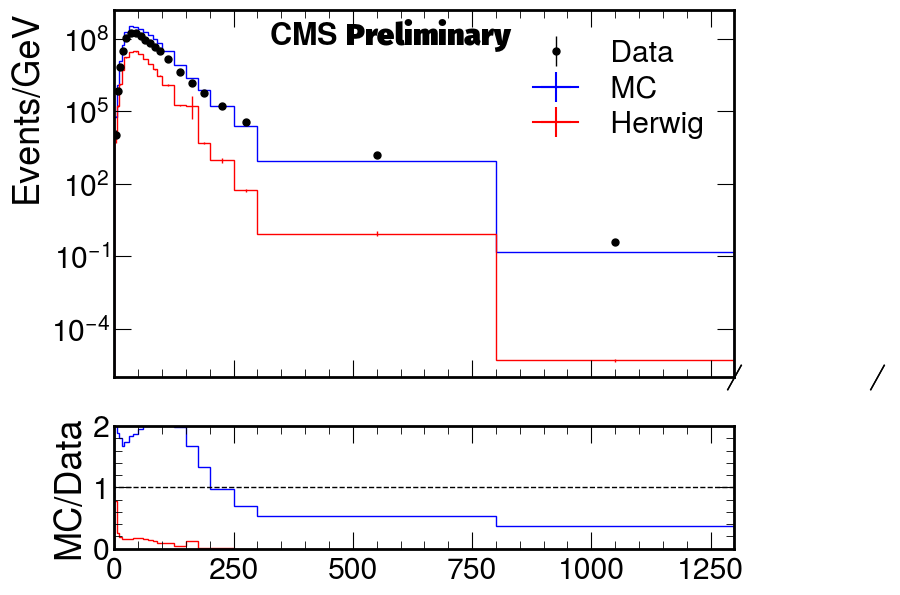

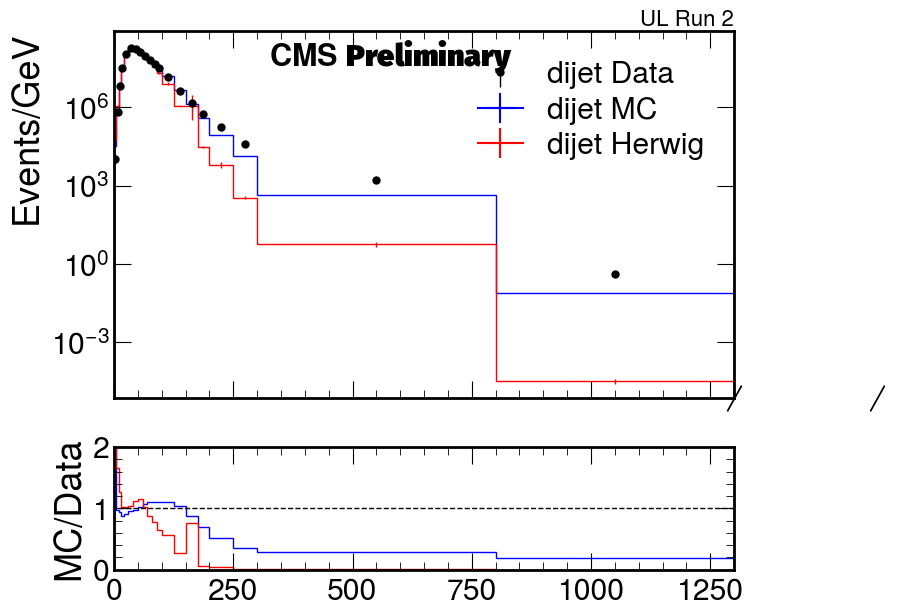

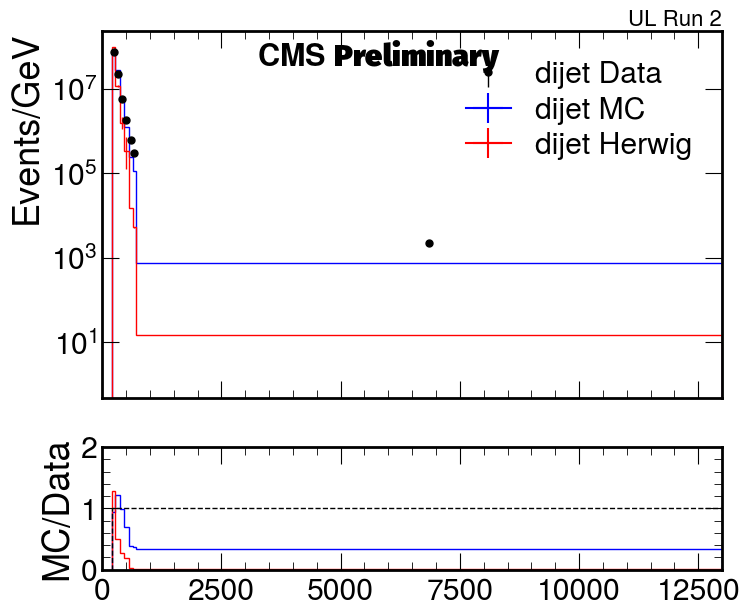

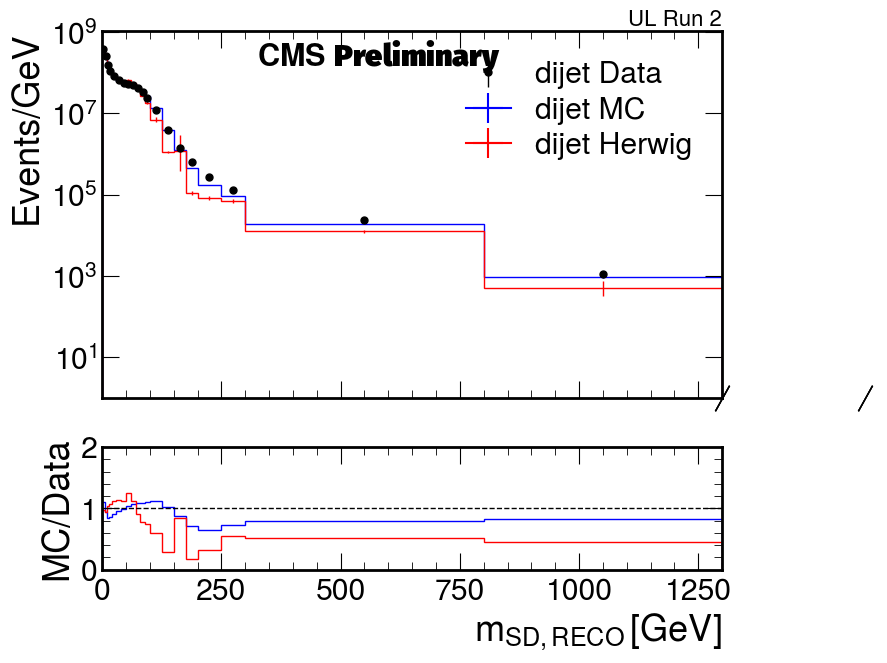

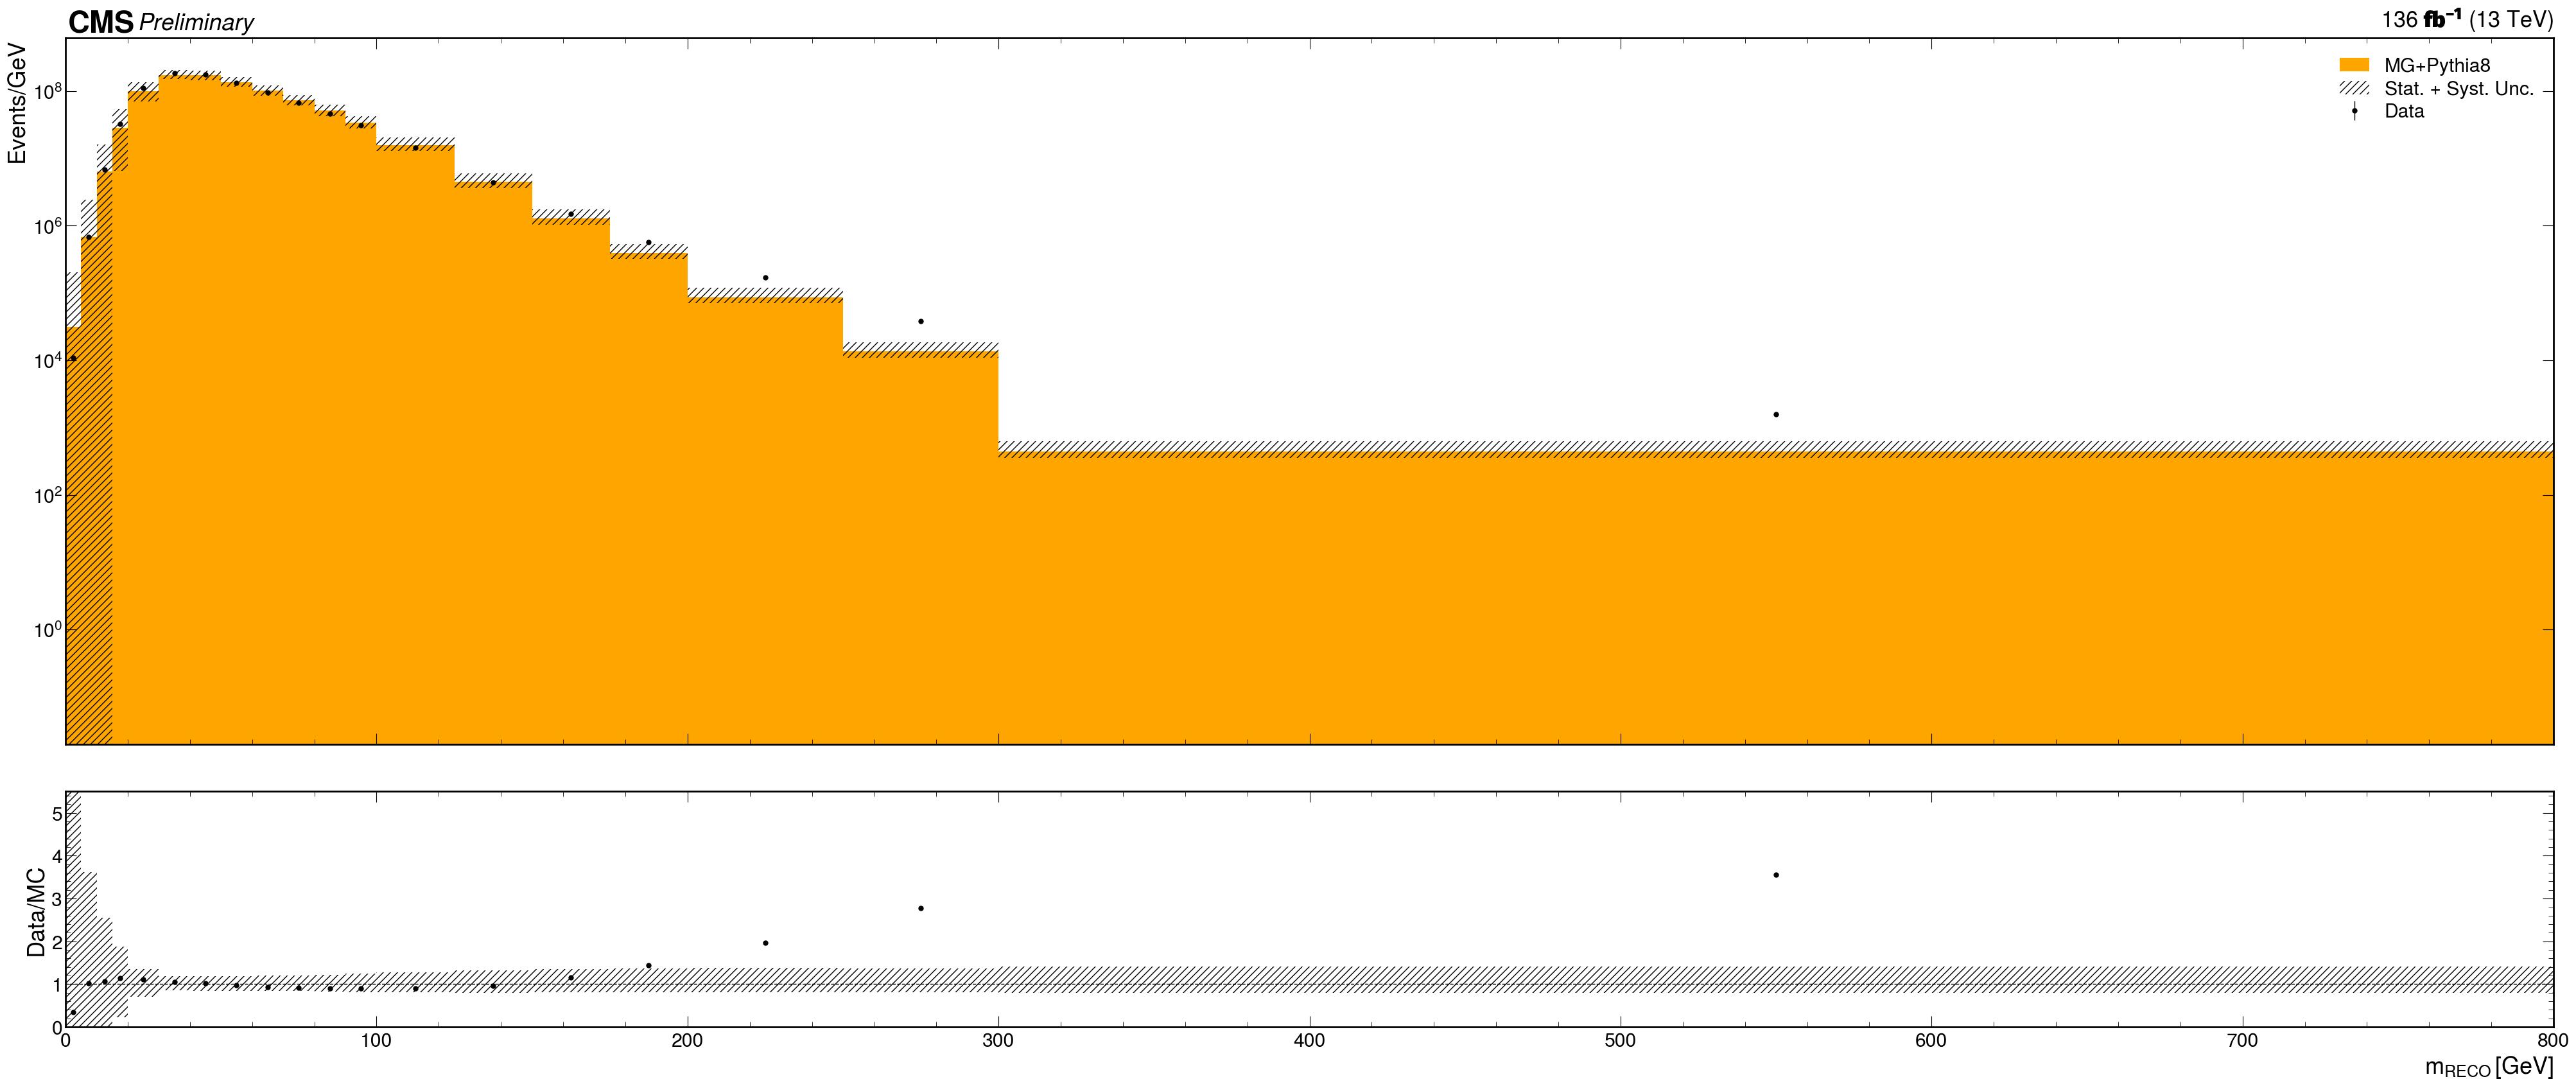

Data values  [1.91479888e+09 1.27721848e+09 7.67810980e+08 5.70100319e+08
 8.51989501e+08 6.53607097e+08 5.67382704e+08 5.31575245e+08
 4.90203937e+08 4.26231827e+08 3.42518305e+08 2.45633137e+08
 2.98044948e+08 9.72741780e+07 3.51483410e+07 1.55295830e+07
 1.34145530e+07 6.40667400e+06 1.21637810e+07 5.53458000e+05]  and variances  [5669447.28236219 4758274.10116693 3759783.76422102 3198733.65894802
 3933900.14900544 3453162.33846904 3276578.02160852 3120785.83473185
 3004766.72299282 2706768.6573686  2307729.03069381 1781169.97747127
 1431280.14721298  436257.29335794  226242.00841356  207065.40549546
  359606.5626612   233108.1227242   301099.04209911   21976.48297613]


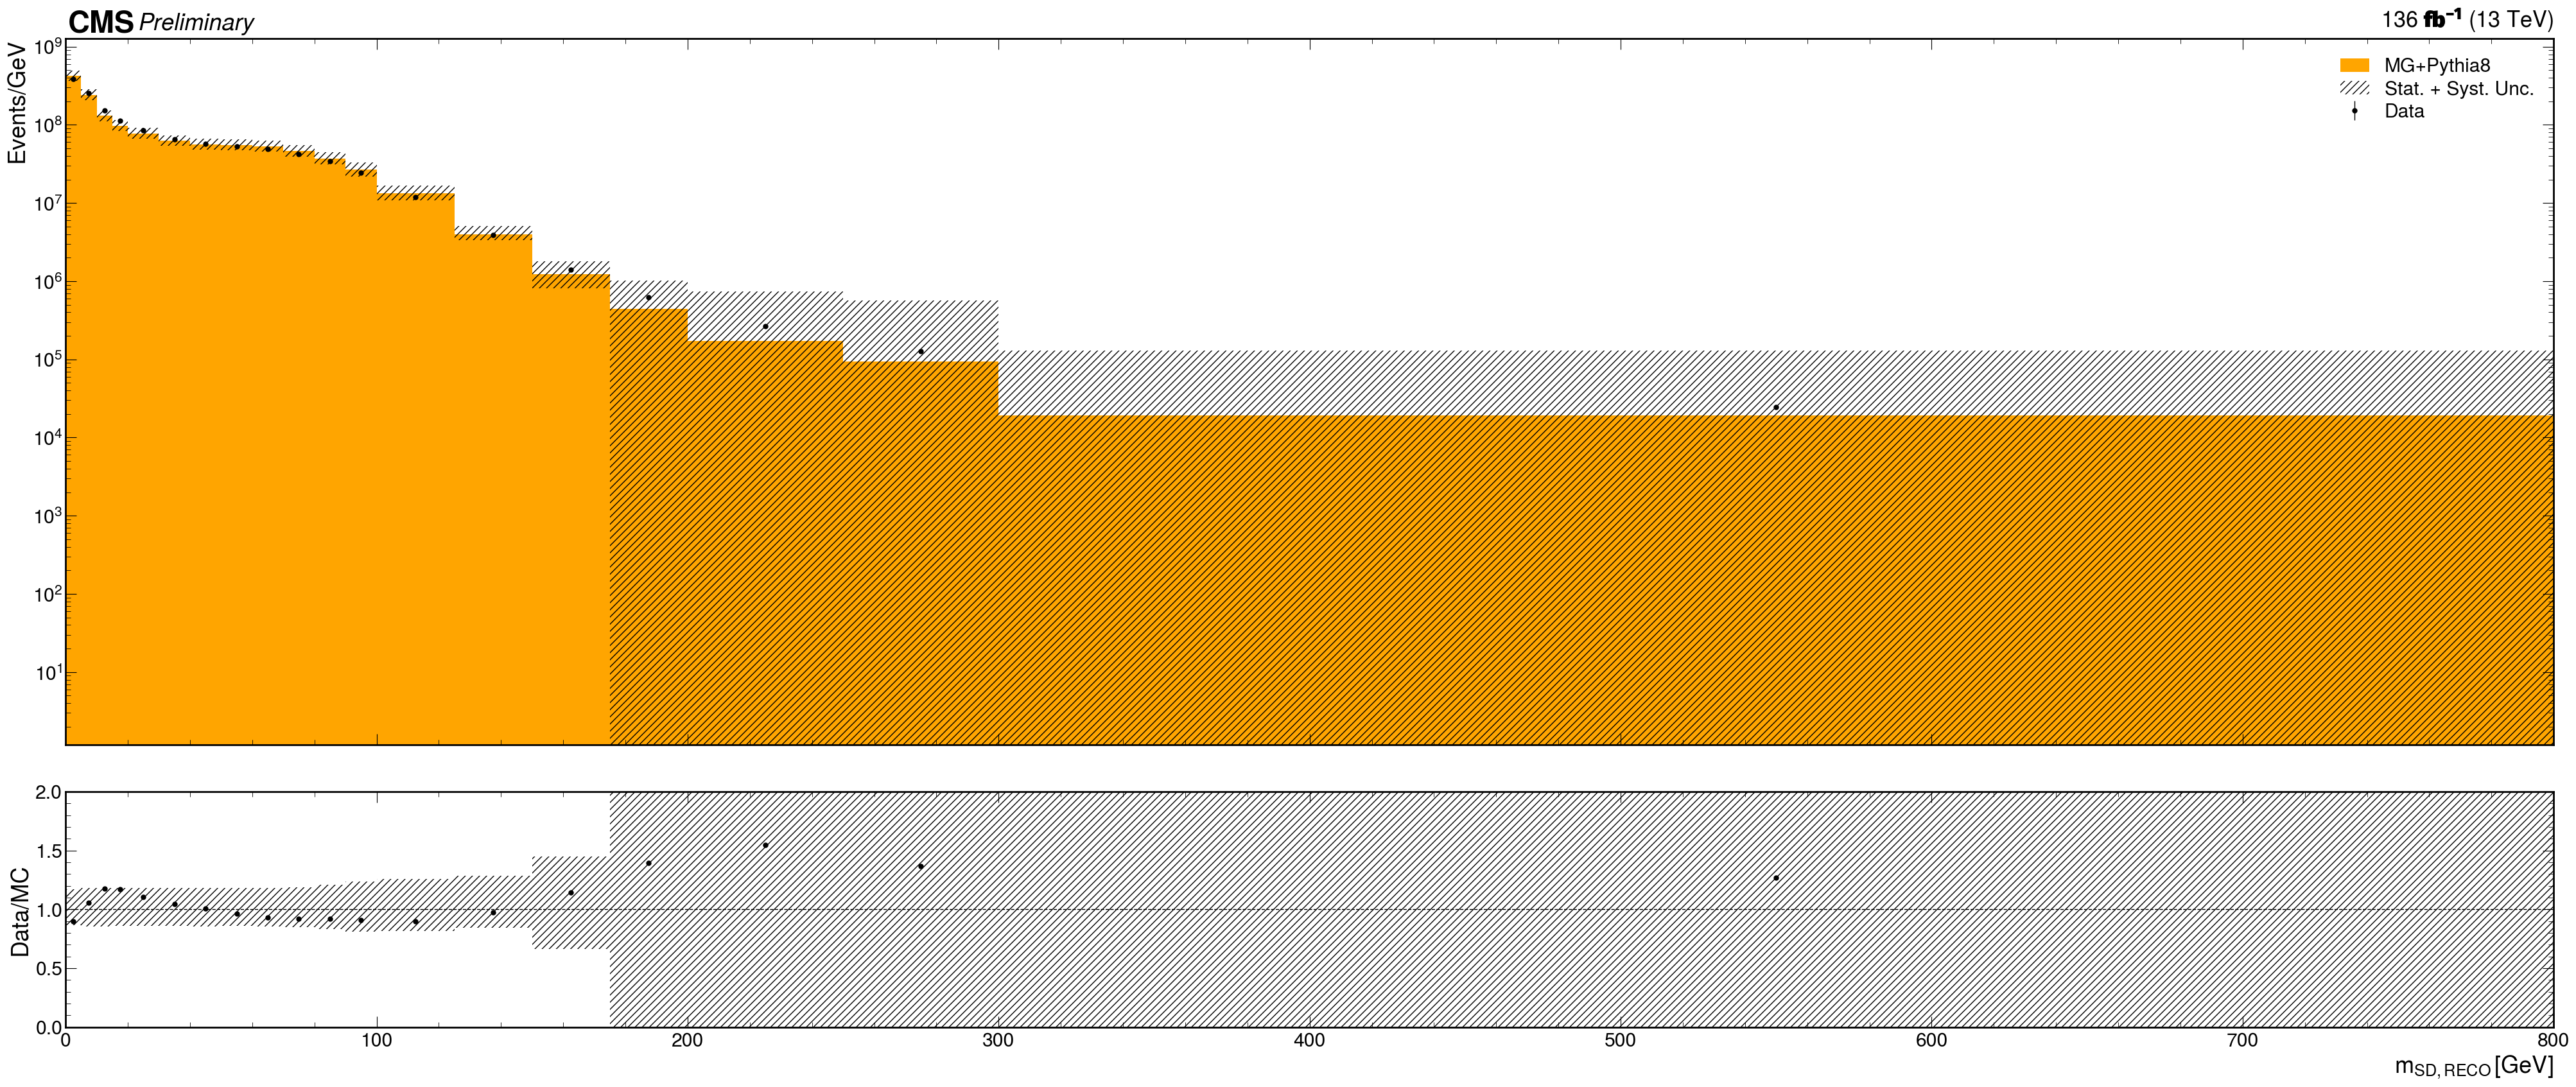

Trimming last bin to be size of second to last bin
Original widths  [   80.   100.    80.   100.    80.    60. 12300.]
Original edges  [200.0, 280.0, 380.0, 460.0, 560.0, 640.0, 700.0, 13000.0]
New widths  [ 80. 100.  80. 100.  80.  60. 800.]
New edges  [200.0, 280.0, 380.0, 460.0, 560.0, 640.0, 700.0, 1500.0]
Data values  [6.04777263e+09 2.34000067e+09 4.67073420e+08 1.81717768e+08
 5.06263500e+07 1.82991500e+07 2.68332400e+07]  and variances  [1.22454468e+07 2.13335350e+06 4.04379131e+05 1.29417371e+05
 4.04431469e+04 1.40746706e+04 7.88543112e+03]
new ticks  [0.0, 200.0, 400.0, 600.0, 800.0, 1000.0, 1200.0, 1400.0, '$\\infty$']


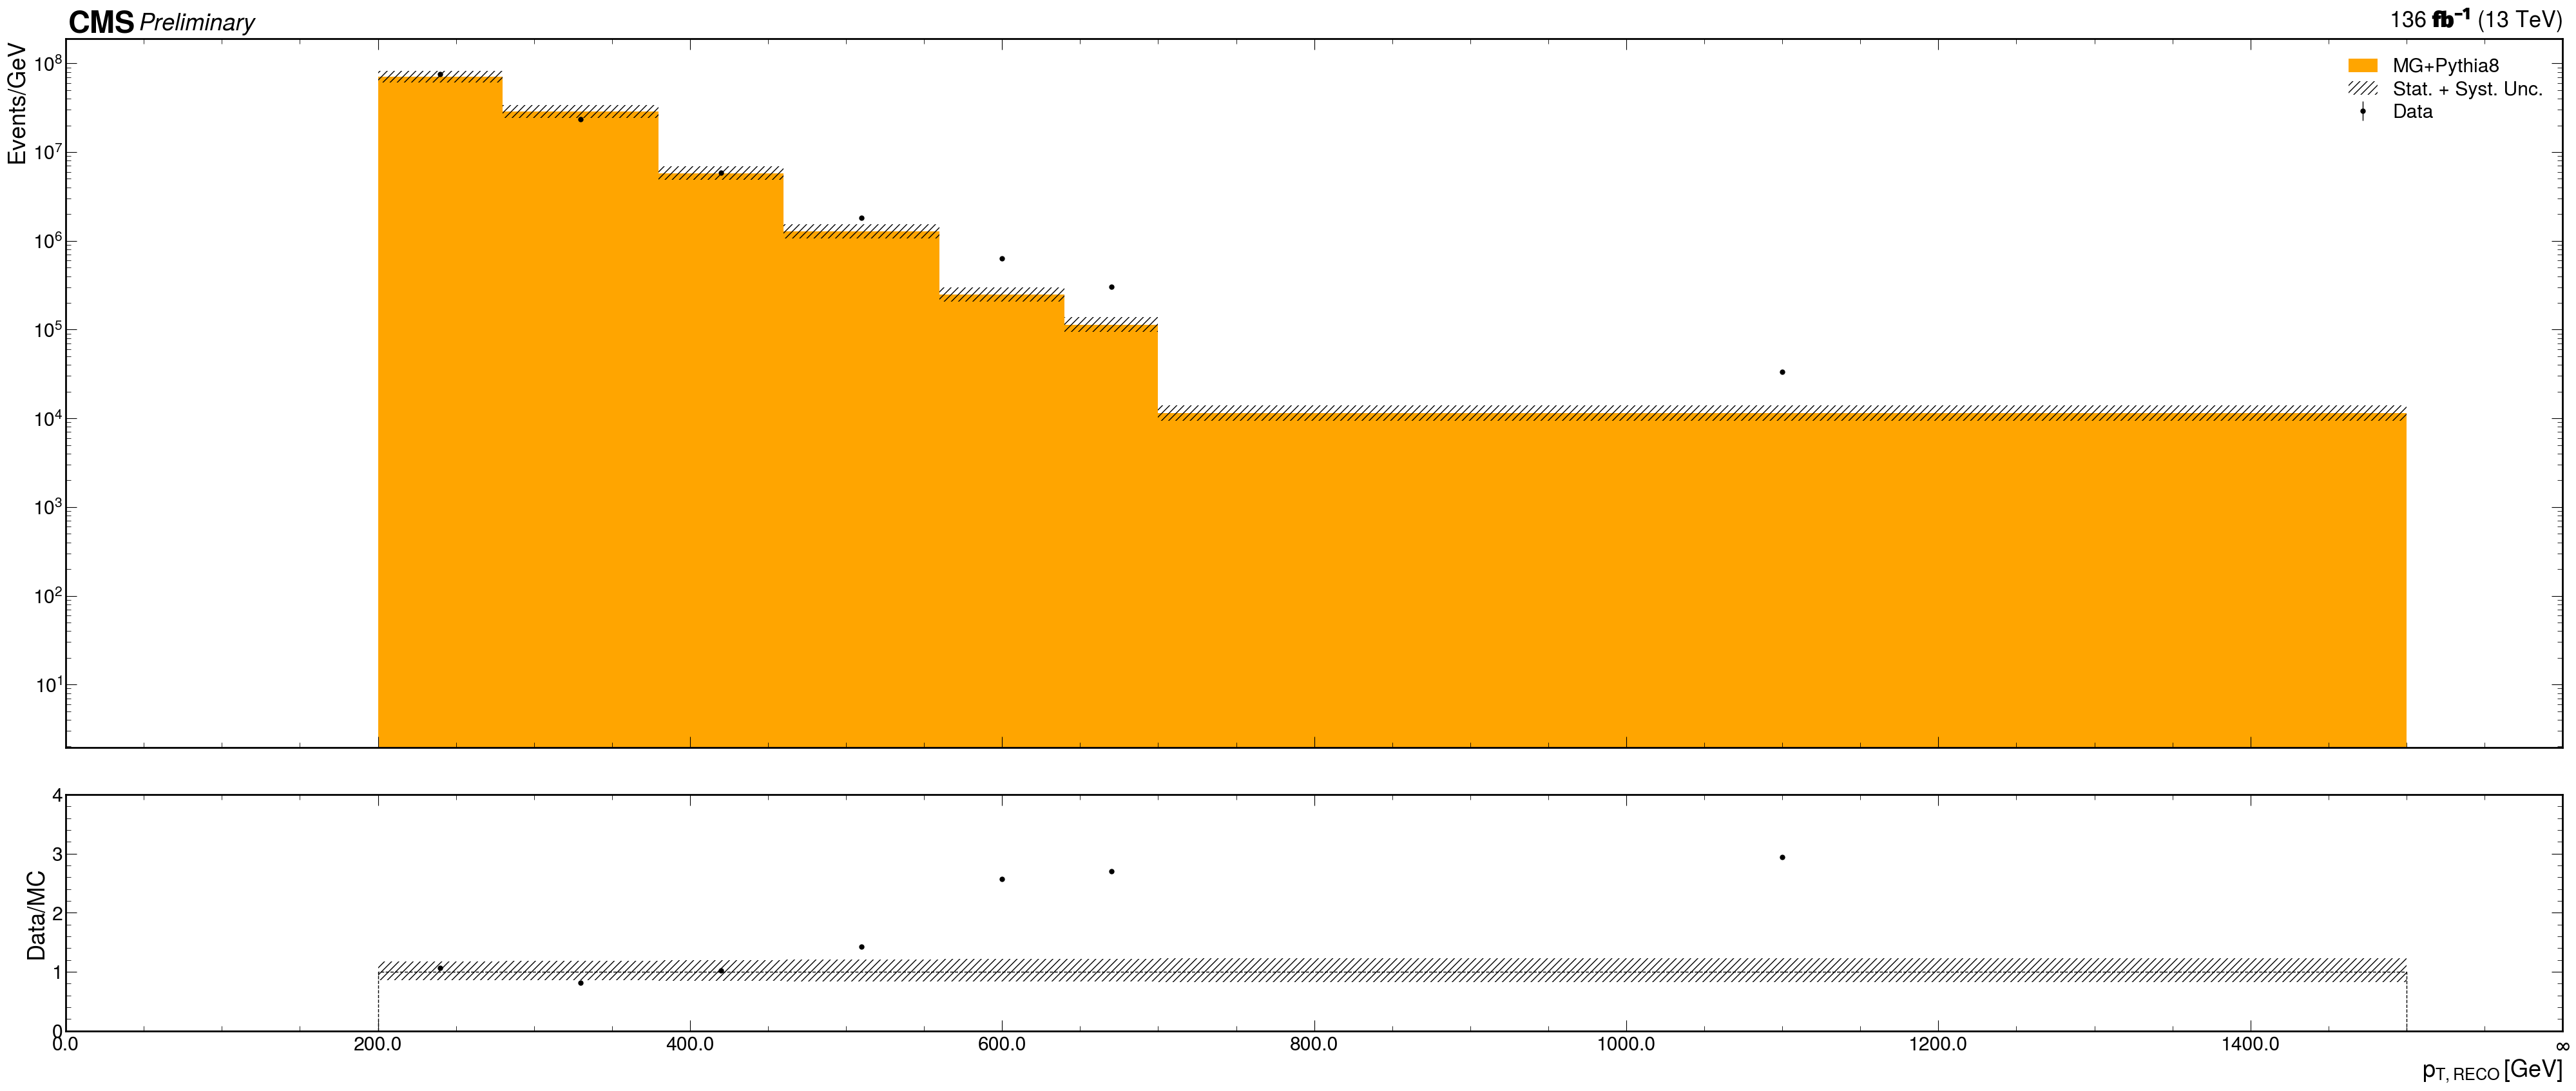

Data values  [7.68994200e+07 1.96631205e+08 2.47720478e+08 2.96996863e+08
 3.50063868e+08 3.80802728e+08 4.31403984e+08 4.80932574e+08
 5.16911690e+08 5.44199228e+08 5.68465144e+08 5.70005896e+08
 5.67867743e+08 5.69191812e+08 5.55016919e+08 5.34363422e+08
 5.13744878e+08 4.73281458e+08 4.19458701e+08 3.83759353e+08
 3.59431375e+08 2.92282206e+08 2.44158143e+08 1.84973252e+08
 6.83420920e+07]  and variances  [1205445.89630394 1826815.22634201 2024136.05096199 2206978.45583979
 2401170.37696412 2486520.70726025 2737397.05049487 2850420.32905921
 2970055.13235697 3058338.04847469 3147329.69414518 3086128.98775732
 3044286.44297527 3127884.9720538  3075704.61828164 3019246.95828314
 2981022.71384034 2810071.17843018 2610088.35421083 2500897.95371203
 2423690.91402204 2141230.1399065  2037250.0059568  1737613.00217511
 1091184.94811375]
2.5


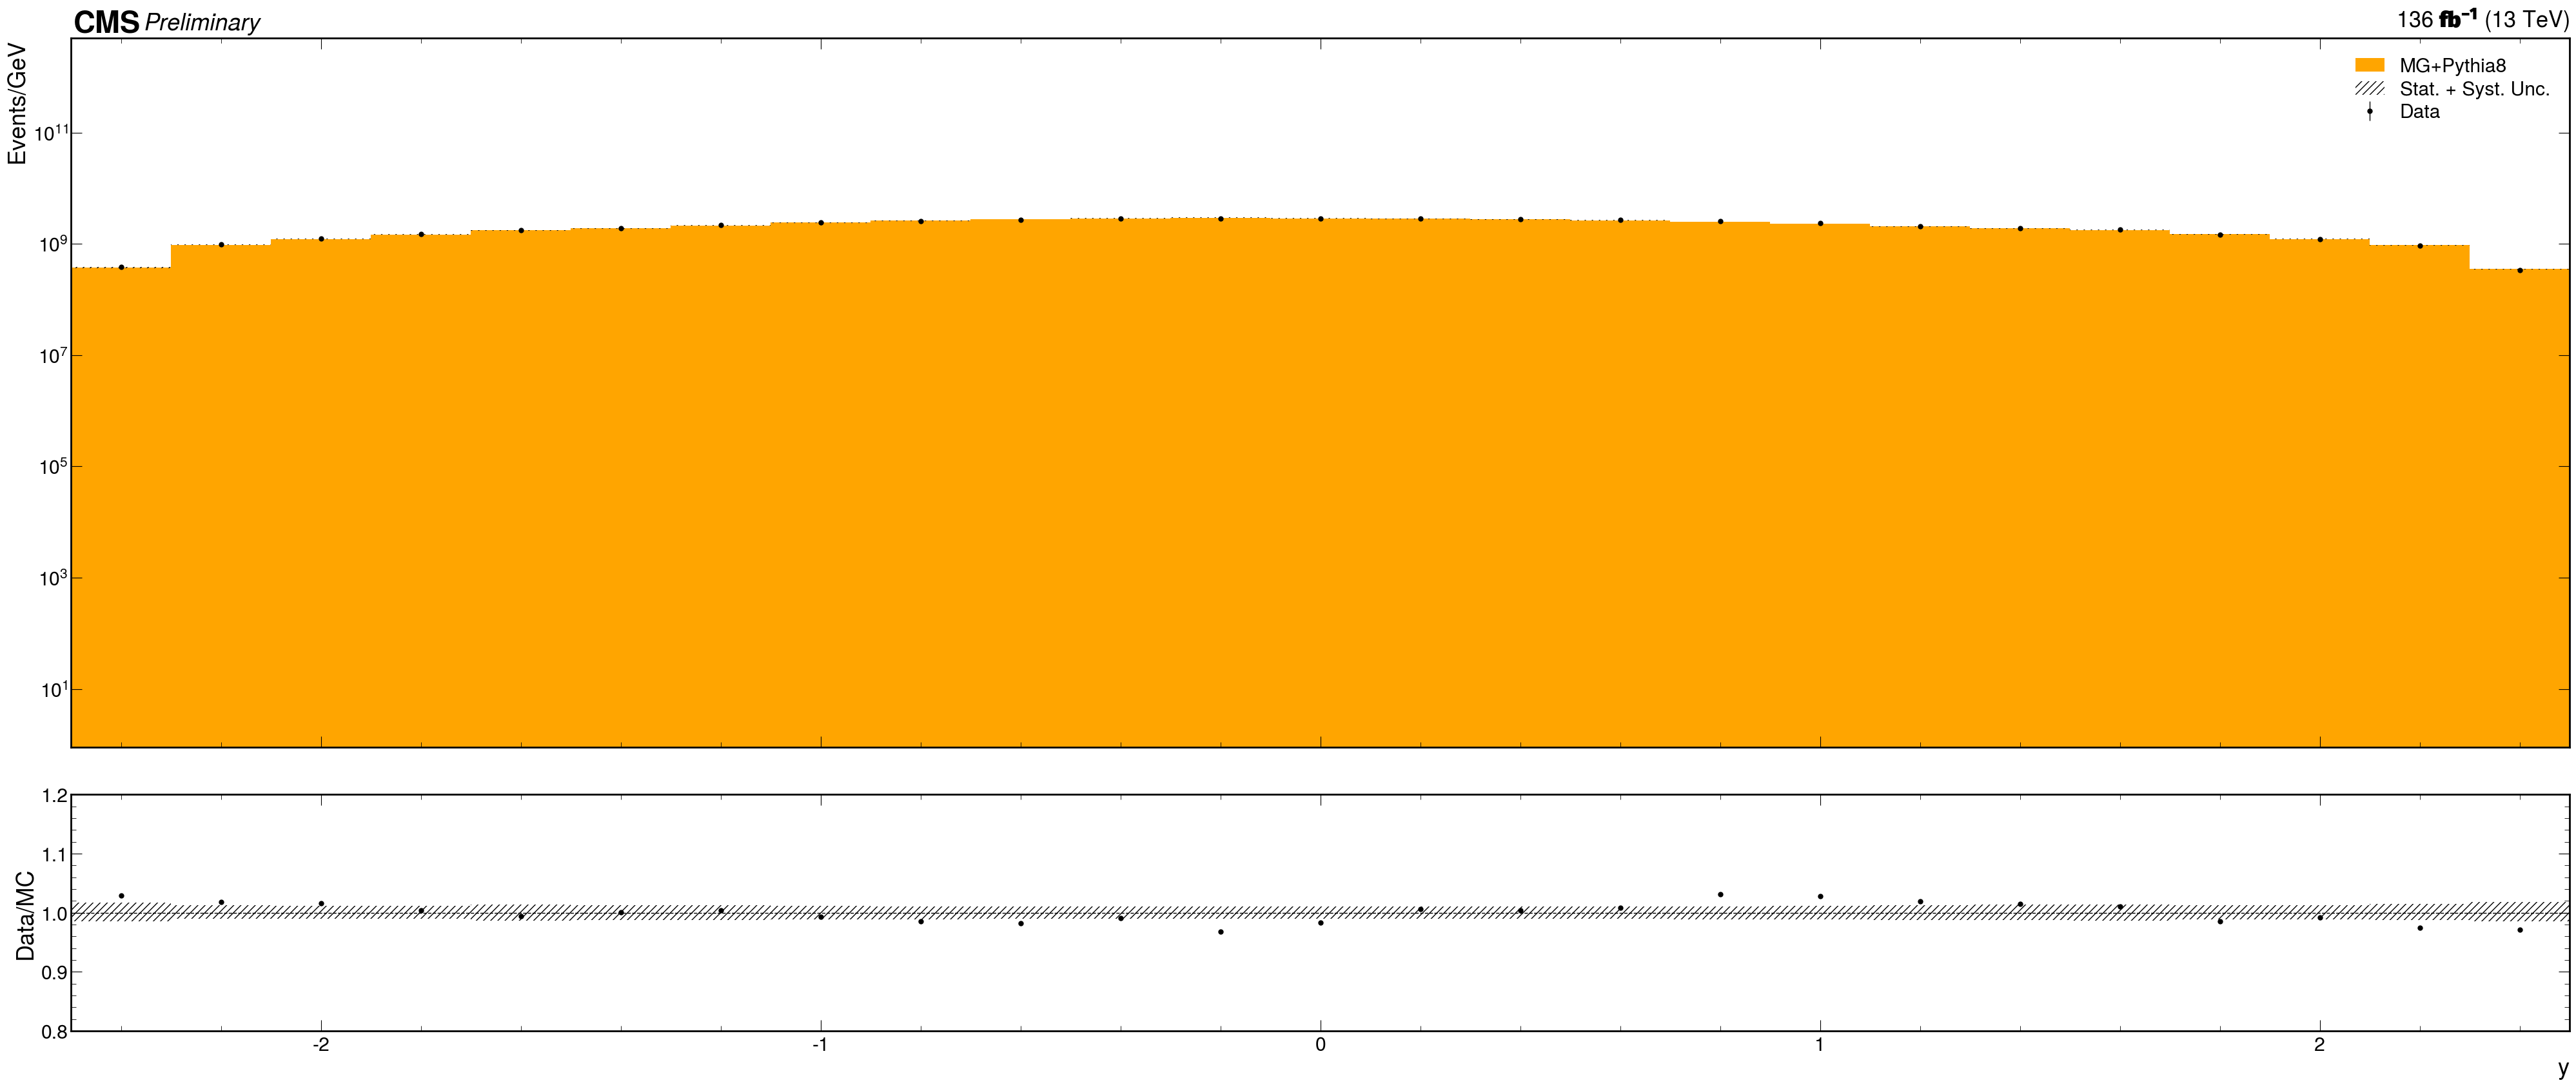

Data values  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.00050792e+08 7.82269340e+08
 7.77280319e+08 7.77713161e+08 7.80920068e+08 8.00730310e+08
 7.98087924e+08 7.79130524e+08 7.79791071e+08 7.80386549e+08
 7.77703467e+08 8.04253942e+08 5.88590585e+08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]  and variances  [      0.               0.               0.               0.
       0.               0.         3259463.8543239  3614798.86134761
 3627119.65771092 3592556.50323262 3552517.72576239 3666664.59888739
 3716920.72657274 3658891.02175236 3622083.22422373 3579258.73293633
 3596727.21930632 3646400.28351798 3168871.03024547       0.
       0.               0.               0.               0.
       0.        ]


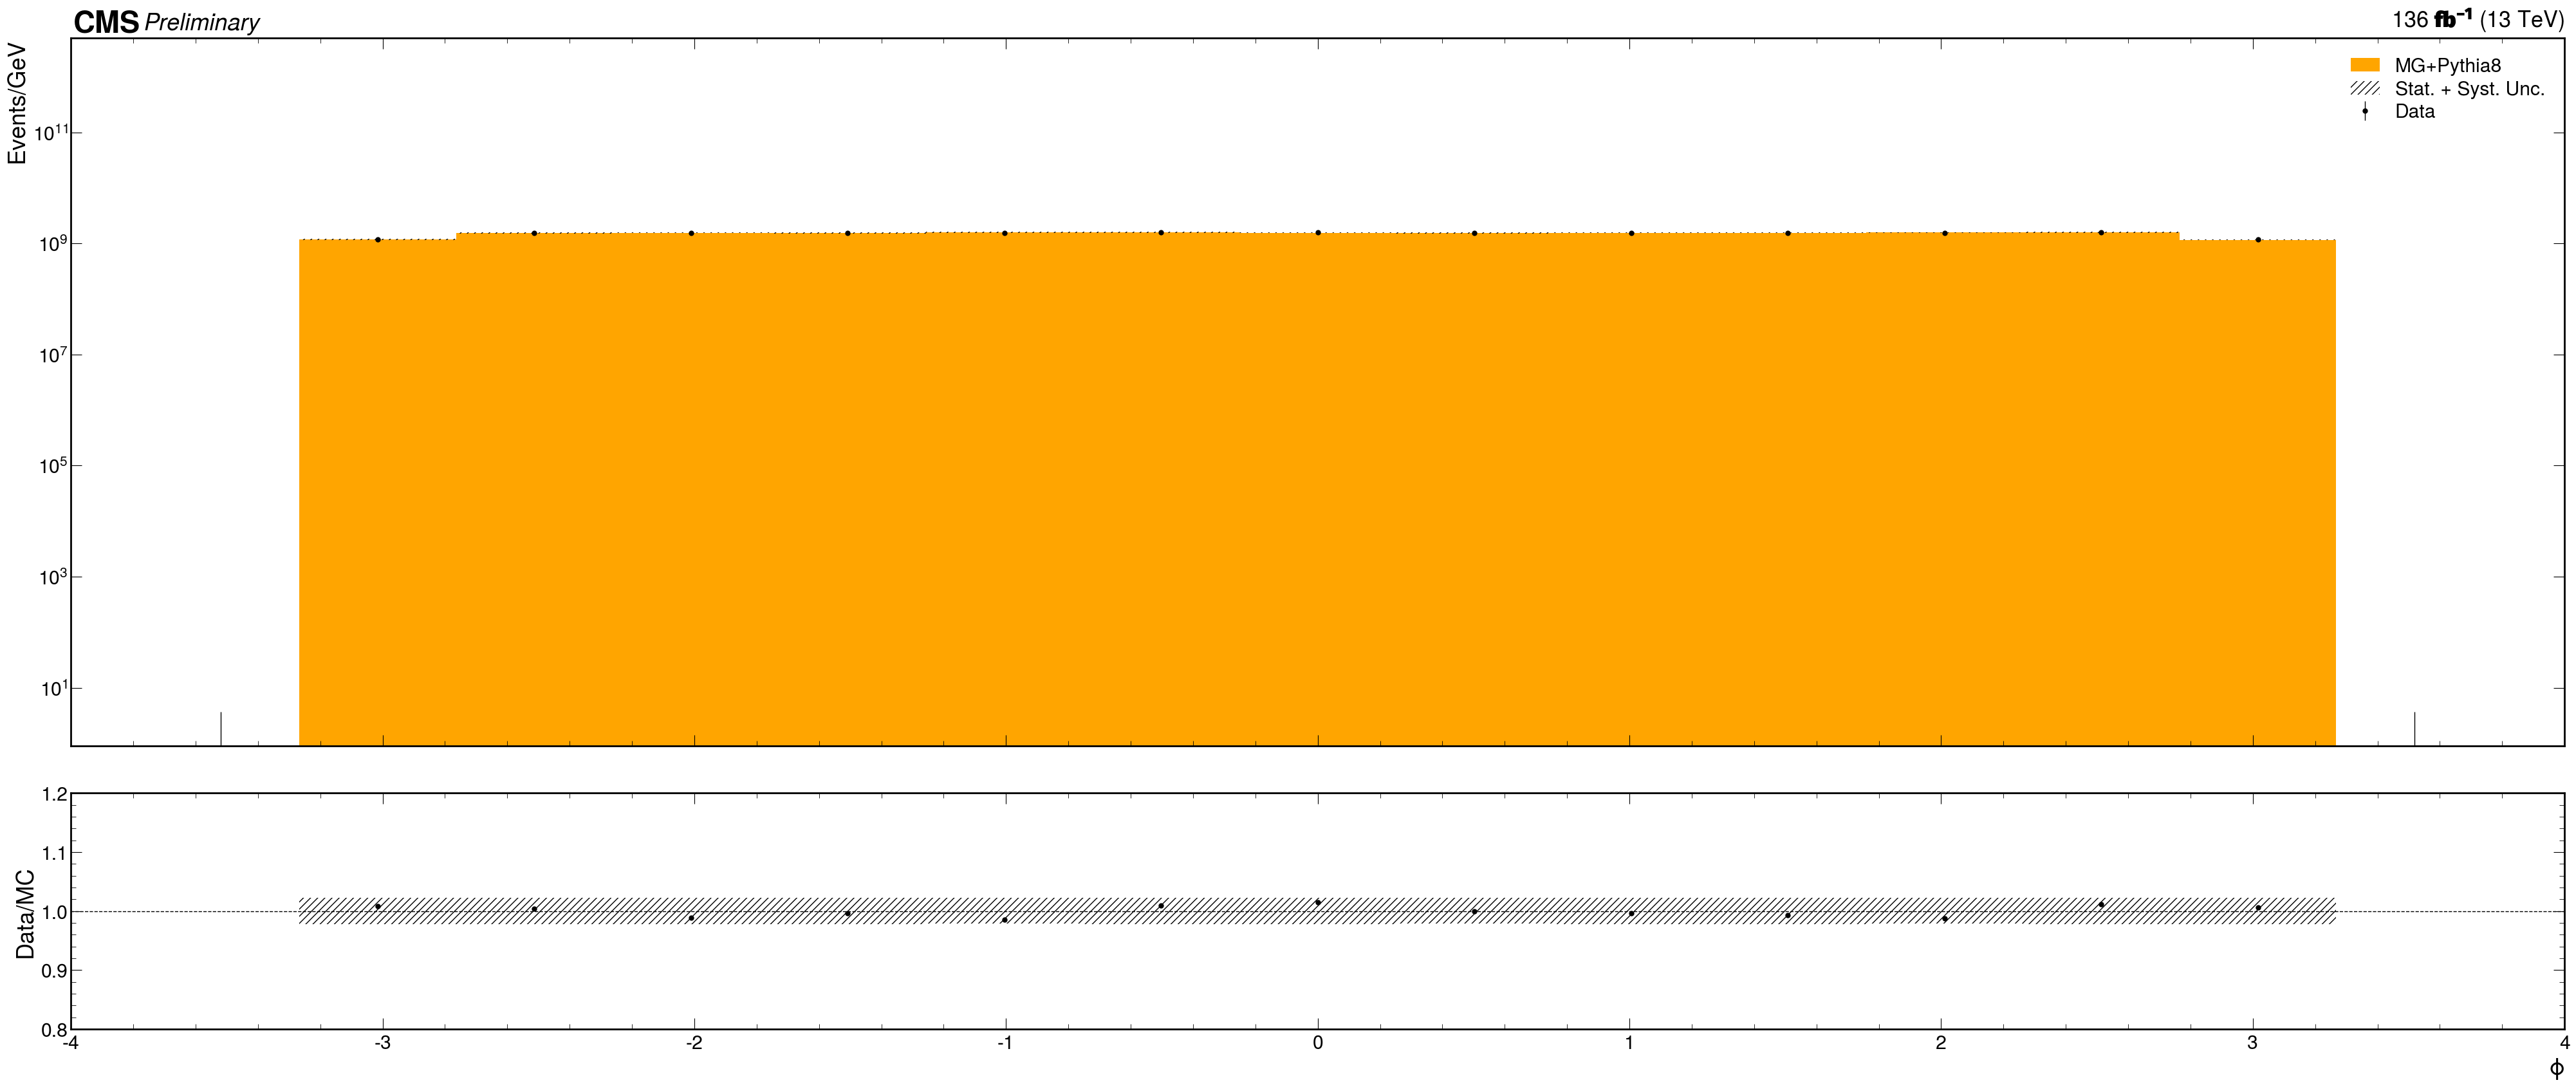

In [9]:
channel = "dijet"
plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco",result_herwig = result_herwig,norm=False)
plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", result_herwig = result_herwig, IOV=year, channel = channel, norm=True)
plotDataMC(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "ptreco", result_herwig = result_herwig,IOV=year, channel =channel ,norm=True)
plotDataMC(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", result_herwig=result_herwig,
        IOV=year, channel = "dijet", norm=True,x_lim=1300.)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV=year, rax_lim = [0.,5.5], channel = channel, norm=True, xlim=800.)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV=year, rax_lim = [0.,2.0], channel = channel, norm=True, xlim=800.)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "ptreco", IOV=year, rax_lim = [0.,4.], channel = channel, norm=True, trim=1500.)
plotDataMCwErrors(result_mc, result_data, "jet_eta_phi", 'jet_rap_reco', "rapidity", IOV=year, rax_lim = [0.8,1.2], channel = channel, norm=True,ylim = [0, 5e12])
plotDataMCwErrors(result_mc, result_data, "jet_phi_reco", 'jet_phi_reco', "phi", IOV=year, rax_lim = [0.8,1.2], channel = channel, norm=True, ylim = [0, 5e12], xlim=4.)
#plotDataMC(result_mc, result_data, "asymm_reco", 'asymm_gen', "frac",  IOV=2018, channel = "dijet")


In [10]:
#### Plot dijet systematics
def comparePlots(hists, denom_hist, axVar):
    axVar = "mgen"
    edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
    availAxes = [ax.name for ax in result_mc[histname].axes]
    availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
    print([ax for ax in result_mc[histname].project("syst").axes[0]])
    print("Available axes: ", availAxes)
    print("Available systs ", availSysts)
    fig, (ax, rax) = plt.subplots(
                    nrows=2,
                    ncols=1,
                    figsize=(7,7),
                    gridspec_kw={"height_ratios": (3, 1)},
                    sharex=True)
    hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
                 ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
    #              ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
    ax.set_xlim(0, 1000)
    rax.set_xlim(0, 1000)
    histname="ptgen_mgen_u"
    hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
                 ax=ax, linestyle ='-', color = 'blue', linewidth=1, label = "Matched ungroomed")
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
    #              ax=axs.flatten()[1], linestyle ='-', color = 'blue', linewidth=1, label = "Matched events ungroomed")
    # histname = "fakes"
    # axVar="mreco"
    # print(result_mc[histname])
    # availAxes = [ax.name for ax in result_mc[histname].axes]
    # availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
    # print([ax for ax in result_mc[histname].project("syst").axes[0]])
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
    #              ax=axs.flatten()[2], linestyle ='-', color = 'red', linewidth=1,)
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
    #              ax=axs.flatten()[3], linestyle ='-', color = 'red', linewidth=1,)
    ratio_misses = np.divide(result_mc["misses"][{'syst':"nominal"}].project(axVar).values(),result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values(),
                          out=np.empty(np.array(result_mc["misses"][{'syst':"nominal"}].project(axVar).values()).shape).fill(np.nan),
                          where=result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values()!= 0,)
    hep.histplot(np.ones_like(ratio_misses), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'blue', linewidth=1)
    hep.histplot(ratio_misses, edges, stack=False, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
    leg = ax.legend(loc='best', labelspacing=0.25)
    leg.set_visible(True)
    rax.set_ylim(0, 1.0)

Hist(
  IntCategory([-1], growth=True, name='jk', label='Jackknife section'),
  Variable([200, 280, 380, 460, 560, 640, 700, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 150, 200, 300, 1300], name='mgen', label='m_{GEN} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=3.53427e+09, variance=1.22544e+12) (WeightedSum(value=3.53427e+09, variance=1.22544e+12) with flow)
Hist(
  IntCategory([-1], growth=True, name='jk', label='Jackknife section'),
  Variable([200, 280, 380, 460, 560, 640, 700, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 150, 200, 300, 1300], name='mgen', label='m_{GEN} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=1.75803e+10, variance=3.35898e+12) (WeightedSum(value=1.75803e+10, variance=3.35898e+12) with flow)
['HEM', 'jerUp', 'jerDown', 'jmrUp', 'jmrDown', 'jmsUp', 'jmsDown', 'nominal', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'Ab

(0.0, 1.0)

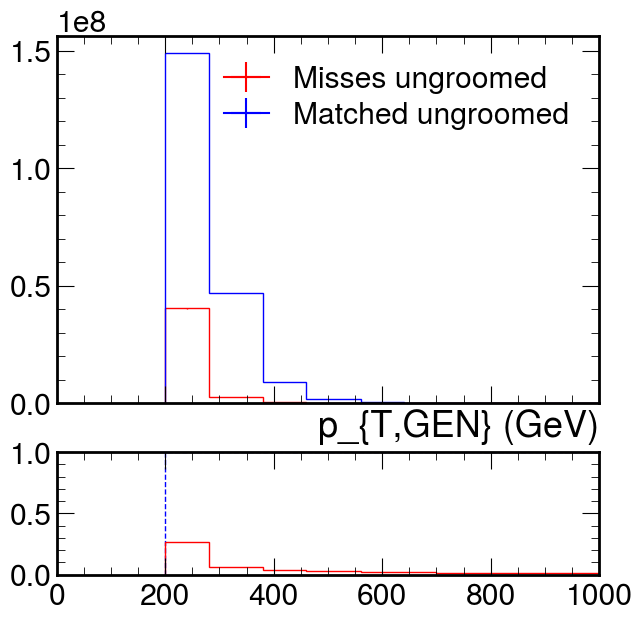

In [6]:
#### Plot dijet systematics
histname="misses"
print(result_mc["misses"][{'syst':'nominal'}])
print(result_mc["ptgen_mgen_u"][{'syst':'nominal'}])
axVar = "ptgen"
edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
availAxes = [ax.name for ax in result_mc[histname].axes]
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
print([ax for ax in result_mc[histname].project("syst").axes[0]])
print("Available axes: ", availAxes)
print("Available systs ", availSysts)
fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
#              ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
ax.set_xlim(0, 1000)
rax.set_xlim(0, 1000)
histname="ptgen_mgen_u"
hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'blue', linewidth=1, label = "Matched ungroomed")
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
#              ax=axs.flatten()[1], linestyle ='-', color = 'blue', linewidth=1, label = "Matched events ungroomed")
# histname = "fakes"
# axVar="mreco"
# print(result_mc[histname])
# availAxes = [ax.name for ax in result_mc[histname].axes]
# availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
# print([ax for ax in result_mc[histname].project("syst").axes[0]])
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
#              ax=axs.flatten()[2], linestyle ='-', color = 'red', linewidth=1,)
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
#              ax=axs.flatten()[3], linestyle ='-', color = 'red', linewidth=1,)
ratio_misses = np.divide(result_mc["misses"][{'syst':"nominal"}].project(axVar).values(),result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values(),
                      out=np.empty(np.array(result_mc["misses"][{'syst':"nominal"}].project(axVar).values()).shape).fill(np.nan),
                      where=result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values()!= 0,)
hep.histplot(np.ones_like(ratio_misses), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'blue', linewidth=1)
hep.histplot(ratio_misses, edges, stack=False, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
leg = ax.legend(loc='best', labelspacing=0.25)
leg.set_visible(True)
rax.set_ylim(0, 1.0)

[-6.283185307179586, -5.780530482605219, -5.277875658030853, -4.775220833456485, -4.272566008882118, -3.7699111843077517, -3.2672563597333846, -2.764601535159018, -2.2619467105846507, -1.7592918860102844, -1.2566370614359172, -0.753982236861551, -0.2513274122871838, 0.2513274122871838, 0.7539822368615514, 1.2566370614359172, 1.7592918860102844, 2.261946710584652, 2.764601535159018, 3.2672563597333846, 3.7699111843077517, 4.272566008882118, 4.775220833456485, 5.277875658030853, 5.780530482605219, 6.283185307179586]
[-2.5, -2.3, -2.1, -1.9000000000000001, -1.7000000000000002, -1.5, -1.2999999999999998, -1.0999999999999996, -0.8999999999999997, -0.7000000000000002, -0.5, -0.30000000000000004, -0.10000000000000009, 0.10000000000000009, 0.30000000000000027, 0.5, 0.7000000000000002, 0.9000000000000004, 1.0999999999999996, 1.2999999999999998, 1.5, 1.7, 1.9000000000000001, 2.1000000000000005, 2.3, 2.5]


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

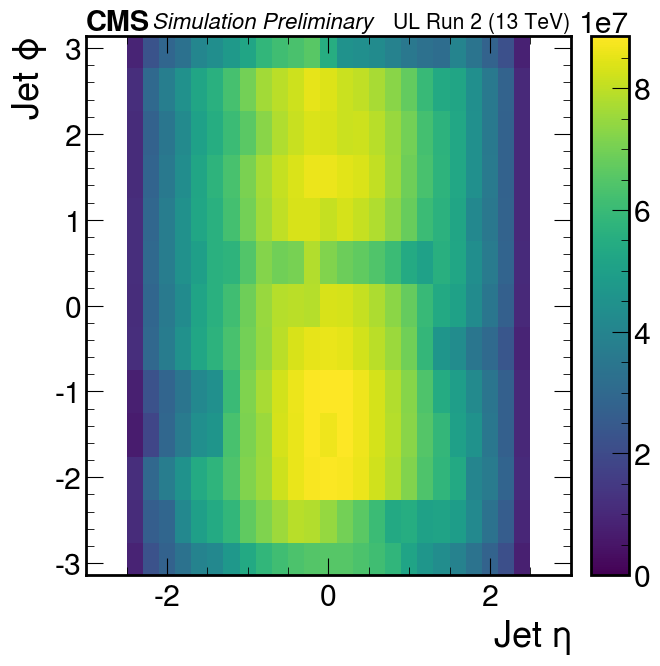

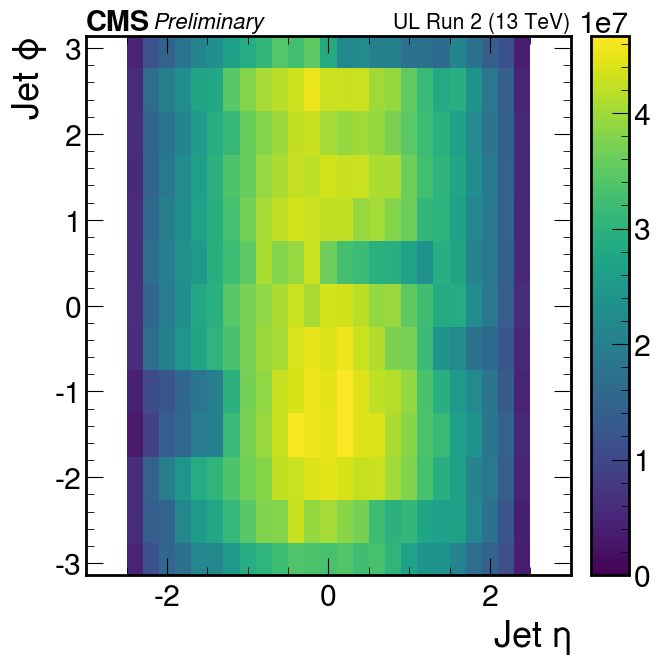

In [33]:
######## Plotting eta phi to check against jet veto maps
fig, ax = plt.subplots(
                    nrows=1,
                    ncols=1,
                    figsize=(7,7),)
phi_edges = [bin[0] for bin in result_mc["jet_eta_phi"].project("phi").axes[0]] + [result_mc["jet_eta_phi"].project("phi").axes[0][-1][1]]
rap_edges = [bin[0] for bin in result_mc["jet_eta_phi"].project("rapidity").axes[0]] + [result_mc["jet_eta_phi"].project("rapidity").axes[0][-1][1]]
print(phi_edges)
print(rap_edges)
hep.hist2dplot(result_mc["jet_eta_phi"][{"syst":"nominal"}].project("rapidity", "phi"))
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.14, 3.14)
hep.cms.label("Preliminary", data = False, year = year, loc=0, ax=ax, fontsize=16)
ax.set_ylabel(r'Jet $\phi$')
ax.set_xlabel(r'Jet $\eta$')
######## Plotting eta phi to check against jet veto maps
fig, ax = plt.subplots(
                    nrows=1,
                    ncols=1,
                    figsize=(7,7),)
hep.hist2dplot(result_data["jet_eta_phi"][{"syst":"nominal"}].project("rapidity", "phi"))
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.14, 3.14)
ax.set_ylabel(r'Jet $\phi$')
ax.set_xlabel(r'Jet $\eta$')
hep.cms.label("Preliminary", data = True, loc=0, year = year, ax=ax, fontsize=16)

['syst', 'jk', 'ptreco', 'mreco']
[200.0, 280.0, 380.0, 460.0, 560.0, 640.0, 700.0]
7
[0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 250.0, 300.0, 800.0]


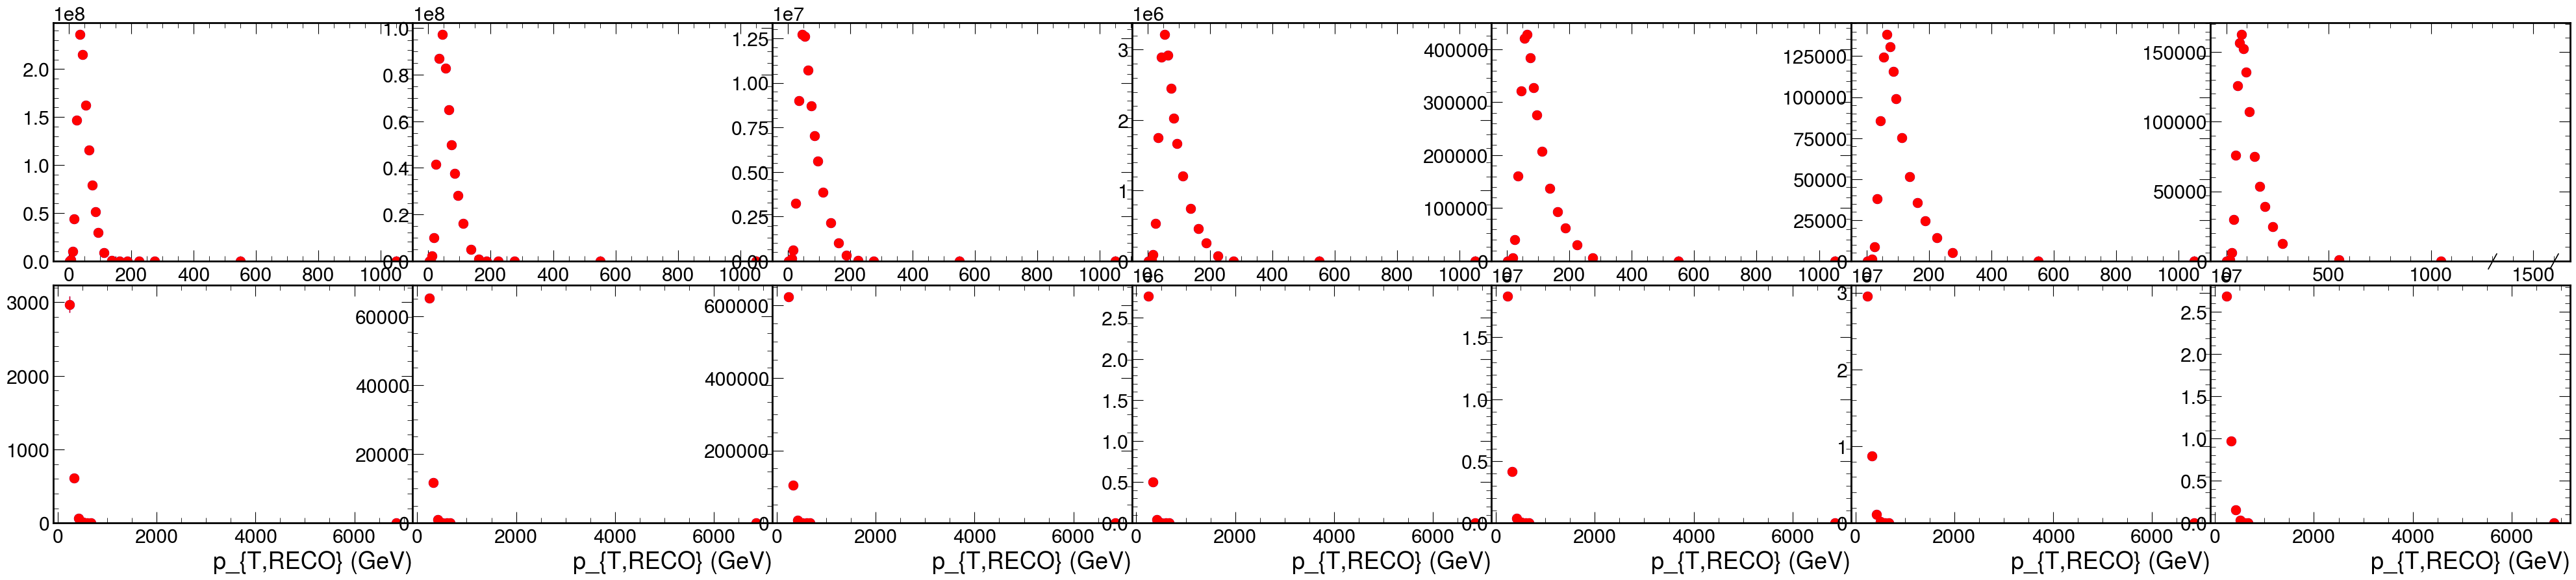

In [7]:
mc_ax = 'ptreco_mreco'
pt_bins = [bin[0] for bin in result_mc[mc_ax+"_u"].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+"_u"].project('mreco').axes[0]]
lastbin = result_mc[mc_ax+"_u"].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+"_u"].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_u"][{'ptreco':i,'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mc_ax+"_u"][{'mreco':i,'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mreco':i, 'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,2E6])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtRecoMReco_u_"+year+".png")

['syst', 'jk', 'ptreco', 'mreco']
[200.0, 280.0, 380.0, 460.0, 560.0, 640.0, 700.0]
7
[0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 250.0, 300.0, 800.0]


IndexError: index 12 is out of bounds for axis 0 with size 12

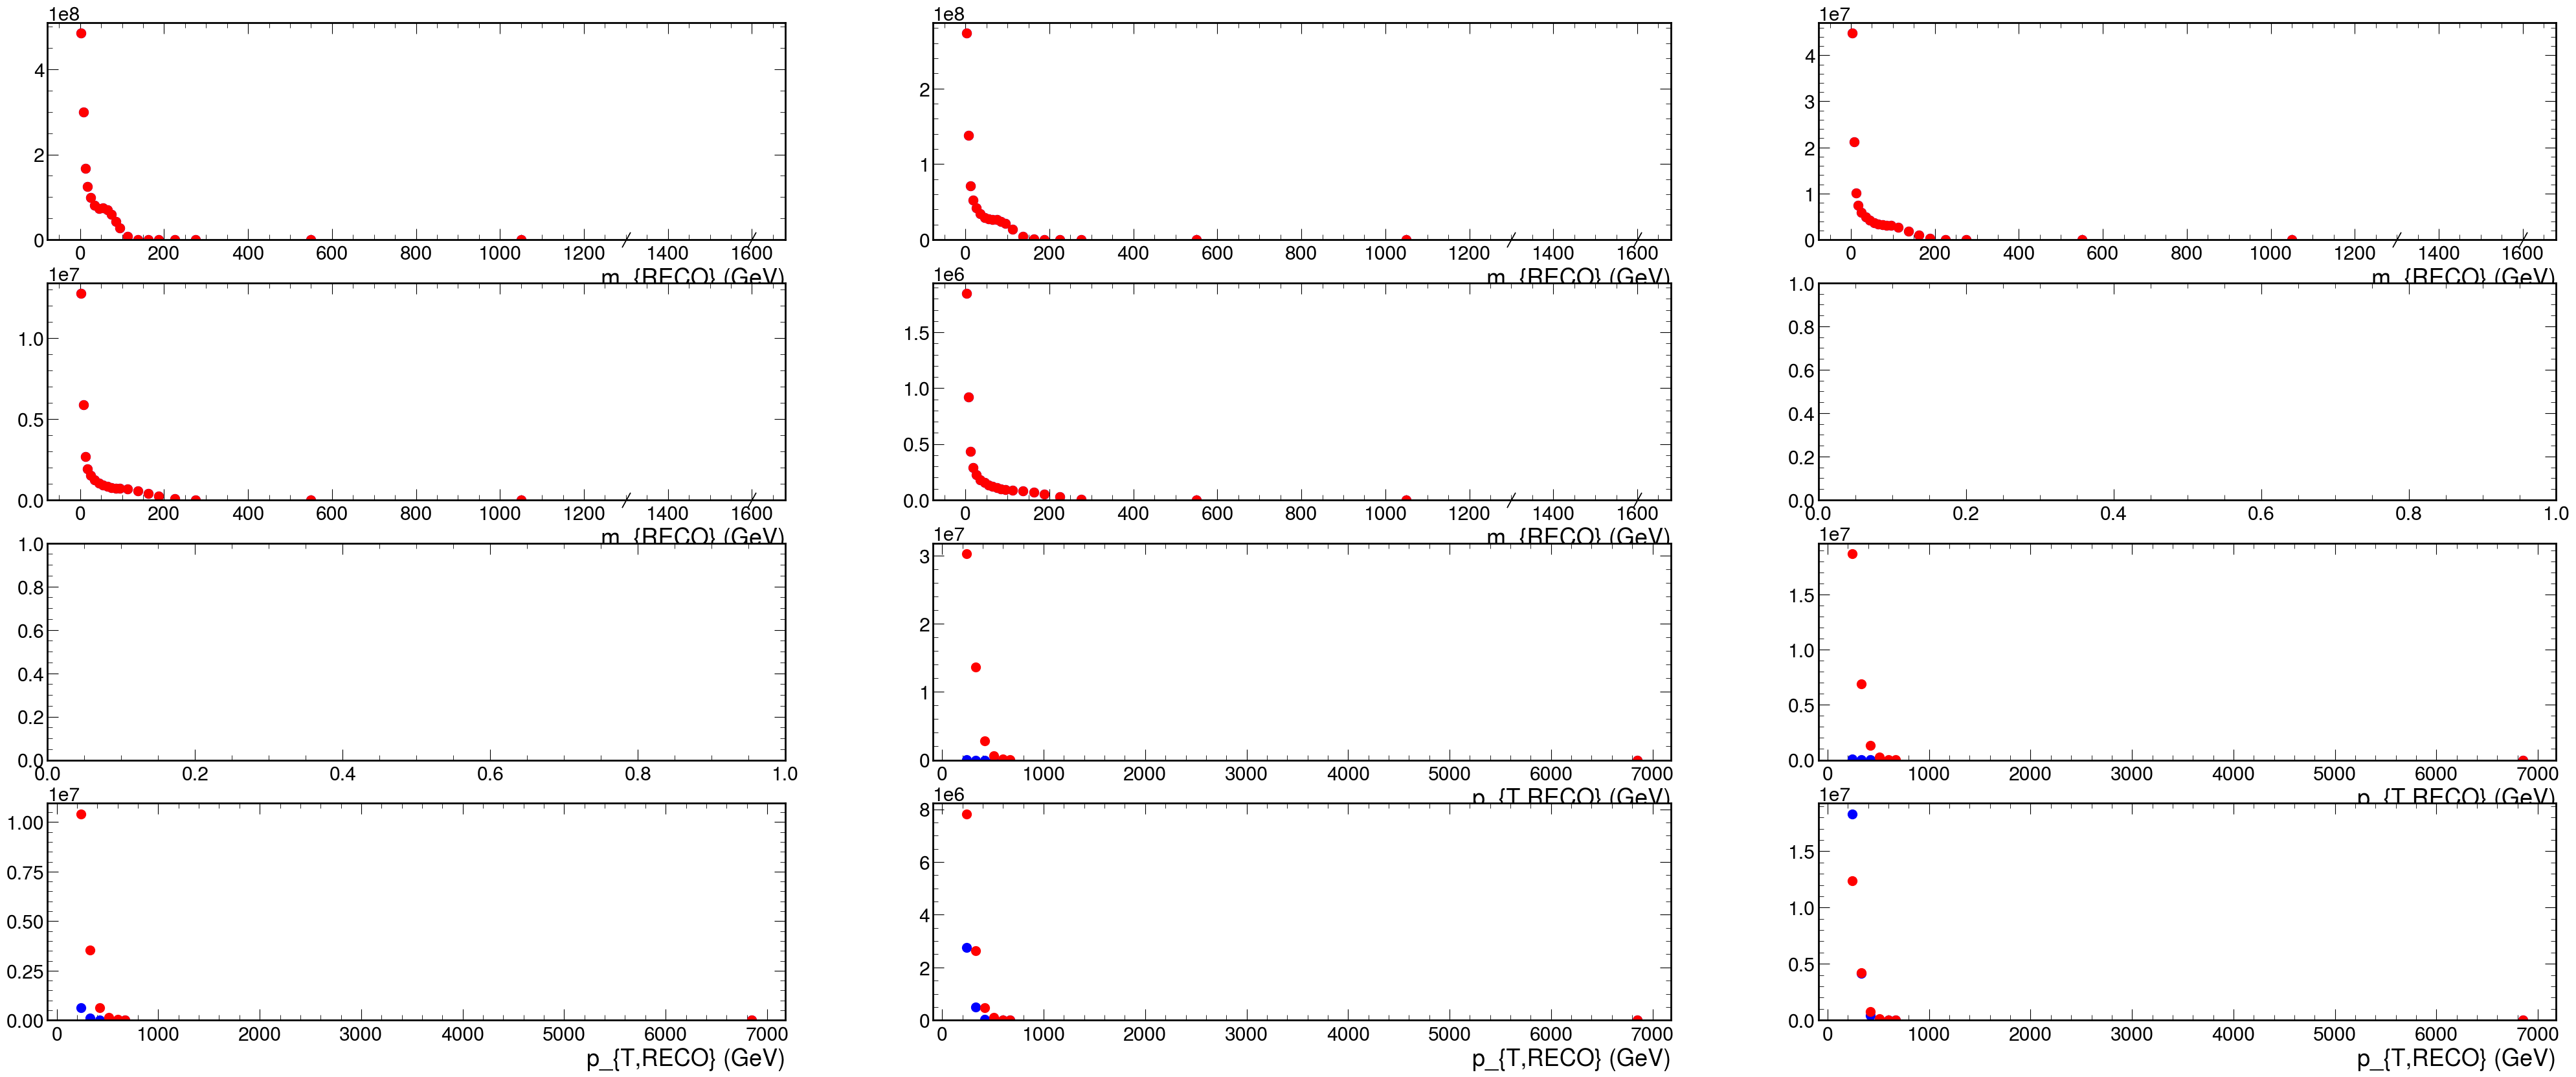

In [8]:
pt_bins = [bin[0] for bin in result_mc[mc_ax+"_g"].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+"_g"].project('mreco').axes[0]]
lastbin = result_mc[mc_ax+"_g"].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+"_g"].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,20)

fig, axs = plt.subplots(4, int(len(pt_bins)/2))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_g"][{'ptreco':i,'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mreco':1*i,'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'mreco':1*i, 'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,2E6])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtRecoMReco_g_"+year+".png")

In [ ]:
mcgen_ax = "ptgen_mgen"
print(result_mc['response_matrix_u'])
pt_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('mgen').axes[0]]
lastbin = result_mc[mcgen_ax+'_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mcgen_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)+1))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i+1]
    axm = axs.flatten()[i+2+len(pt_bins)]
    hep.histplot(result_mc[mcgen_ax+'_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    print("Bin ", i, " ", result_mc[mcgen_ax+'_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen').values(flow=False))
    print("Uncertainty ", i, " ", result_mc[mcgen_ax+'_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen').variances())
    hep.histplot(result_mc['response_matrix_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red',
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mcgen_ax+'_u'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,1E7])
plt.subplots_adjust(wspace=0.2, hspace=0.20)
hep.histplot(result_mc[mcgen_ax+'_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'red', 
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc[mcgen_ax+'_u'][{'mgen':hist.underflow, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_u'][{'mgen':hist.underflow, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
print("Bin under ", result_mc[mcgen_ax+'_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen').values(flow=False))
print("Uncertainty under ", result_mc[mcgen_ax+'_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen').variances())
# axs[0,0].set_xlim([0,1000])
# axs[0,0].set_ylim([0,4E7])
# print(result_mc['response_matrix_u'][hist.underflow])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtGenMGen_u_"+year+".png")

In [ ]:
print(result_mc['response_matrix_u'])
pt_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('mgen').axes[0]]
lastbin = result_mc[mcgen_ax+'_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mcgen_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)+2))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i+1]
    axm = axs.flatten()[i+2+len(pt_bins)]
    hep.histplot(result_mc[mcgen_ax+'_g'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red',binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mcgen_ax+'_g'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    ax.set_xlim([0,1000])
    ax.set_ylim([0,4E7])
    axm.set_xlim([0,1000])
    axm.set_ylim([0,1E7])
plt.subplots_adjust(wspace=0.0, hspace=0.20)
hep.histplot(result_mc[mcgen_ax+'_g'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_g'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc[mcgen_ax+'_g'][{'mgen':hist.underflow,  'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_g'][{'mgen':hist.underflow, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
# axs[0,0].set_xlim([0,1000])
# axs[0,0].set_ylim([0,4E7])
# print(result_mc['response_matrix_u'][hist.underflow])
plt.savefig(os_path+"/unrolledPtGenMGen_g_"+year+".png")

In [ ]:
fname = "coffeaOutput/trijet/trijetHists_JetHT_pt200.0_rapidity2.5_nominal2018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
# fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_nominal2018.pkl"
fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_nominal2018.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
year = fname[-8:-4]
fname = "coffeaOutput/trijetHists_QCDsim_pt200.0_eta2.4_bbloose.pkl"
with open(fname, "rb") as f:
    result_mc_old = pickle.load( f )[0]
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print(result_mc.keys())
print(result_data.keys())
# print(result_mc["cutflow"])
print(result_mc["jet_rap_reco"].axes)
print(result_data["asymm_reco"].axes)
checkdir(os_path)

In [ ]:
plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "ptreco", IOV=2018, channel = "trijet", norm=True)
plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV=2018, channel = "trijet", norm=True)
plotDataMC(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV=2018, channel = "trijet", norm=True)
plotDataMC(result_mc, result_data, "jet_rap_reco", 'jet_rap_reco', "rapidity", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "asymm_reco", 'asymm_reco', "frac", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "dphimin_reco", 'dphimin_reco', "dphi", 
           IOV=2018, channel = "trijet")

In [ ]:

histname="fakes"
availAxes = [ax.name for ax in result_mc[histname].axes]
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
print([ax for ax in result_mc[histname].project("syst").axes[0]])
print("Available axes: ", availAxes)
print("Available systs ", availSysts)
fig, axs = plt.subplots(2,2,figsize=(20,14),)
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[0], linestyle ='-', color = 'red', linewidth=1, label = 'fakes ungroomed')
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[1], linestyle ='-', color = 'red', linewidth=1, label = 'fakes ungroomed')
axs.flatten()[0].set_xlim(0, 300)
histname="fakes_g"
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[0], linestyle ='-', color = 'blue', linewidth=1, label = "Fakes groomed")
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[1], linestyle ='-', color = 'blue', linewidth=1, label = "Fakes groomed")
axs.flatten()[1].set_xlim(0, 2000)
histname = "fakes_eta_phi"
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("eta"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[2], linestyle ='-', color = 'red', linewidth=1,)
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("phi"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[3], linestyle ='-', color = 'red', linewidth=1,)
for ax in axs.flatten():
    leg = ax.legend(loc='best', labelspacing=0.25)
    leg.set_visible(True)

In [ ]:
pt_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('mreco').axes[0]]
lastbin = result_mc[mc_ax+'_u'].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_u"][{'ptreco':i,'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'mreco':2*i,'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mreco':2*i, 'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,10000])
    # axm.set_xlim([0,2000])
    # axm.set_ylim([0,10000])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(os_path+"/unrolledPtRecoMReco"+year+".png")

In [ ]:
mc_ax = "ptgen_mgen"
pt_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('mgen').axes[0]]
lastbin = result_mc[mc_ax+'_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)
fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_u"][{'ptgen':i,'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mc_ax+"_u"][{'mgen':i,'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,2000])
    # ax.set_ylim([0,10000])
    # axm.set_xlim([0,2000])
    # axm.set_ylim([0,10000])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(os_path+"/unrolledPtGenMGen.png")

In [ ]:
mc_ax = "ptreco_mreco"
plt.rcParams["figure.figsize"] = (20,10)
print(result_mc.keys())
axis_names = [ax.name for ax in result_mc[mc_ax+'_u'].axes]
print(axis_names)
cats = [cat for cat in result_mc[mc_ax+'_u'][{'ptreco':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_mc[mc_ax+'_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(2, 2)
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
print(cats)
fig.suptitle('Trijet Data and MC w/ JER+JES corrections ungroomed (top) and groomed (bottom) reco jets')
# mc = [result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco')]
data = [result_data['ptreco_mreco_u'][{'syst':'nominal'}].project('mreco'), 
        result_data['ptreco_mreco_g'][{ 'syst':'nominal'}].project('mreco'),
       result_data['ptreco_mreco_u'][{ 'syst':'nominal'}].project('ptreco'), 
        result_data['ptreco_mreco_g'][{ 'syst':'nominal'}].project('ptreco')]
mc_old = [result_mc_old['jet_pt_mass_reco_u'].project('mreco'), 
        result_mc_old['jet_pt_mass_reco_g'].project('mreco'),
       result_mc_old['jet_pt_mass_reco_u'].project('ptreco'), 
        result_mc_old['jet_pt_mass_reco_g'].project('ptreco')]
for i, ax in enumerate(axs.flatten()):
    hep.histplot(data[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = 'black',
                         label=['Trijet Data'])
    hep.histplot(mc_old[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["."], color = 'teal',
                         label=['MC w/o xs scaling'])
    for j in range(len(cats)):
        syst=cats[j]
        mc = [result_mc[mc_ax+'_u'][{ 'syst':syst}].project('mreco'), result_mc[mc_ax+'_g'][{'syst':syst}].project('mreco'),
             result_mc[mc_ax+'_u'][{'syst':syst}].project('ptreco'), result_mc[mc_ax+'_g'][{'syst':syst}].project('ptreco')]
        hep.histplot(mc[i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"],
                             color = colors[j], linewidth=1,
                         label=['QCD sim '+syst])
    ax.legend()
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJESlog.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
fig.suptitle('Trijet Data and MC w/ JER+JES corrections ungroomed (left) and groomed (right) reco jets')
grids = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
subgrids = [grid.subgridspec(4,1, wspace=0, hspace=0) for grid in grids]
mc = [result_mc[mc_ax+'_u'][{'syst':'nominal'}].project('mreco'), result_mc[mc_ax+'_g'][{'syst':'nominal'}].project('mreco'),
      result_mc[mc_ax+'_u'][{'syst':'nominal'}].project('ptreco'), result_mc[mc_ax+'_g'][{'syst':'nominal'}].project('ptreco')]
def plotratio_cms(num, denom, ax, color, label):
    ratio = num.values() /  denom.values()
    ratio[ratio == 0] = np.nan
    ratio[np.isinf(ratio)] = np.nan
    hep.histplot(ratio, bins = num.axes.edges[0], stack=False, histtype='errorbar',binwnorm=True,
                         ax=ax, density=False, linestyle =["-"], color = color, linewidth=1,
                         label=[label])
for i, sg in enumerate(subgrids):
    num = data[i]
    denom = mc[i]
    main_ax = fig.add_subplot(sg[:-1, :])
    # main_ax.set_yscale("log")
    subplot_ax = fig.add_subplot(sg[-1, :], sharex=main_ax)
    plt.setp(main_ax.get_xticklabels(), visible=False)
    main_ax, sublot_ax = num.plot_ratio(denom,
                                        rp_num_label="data",
                                        rp_denom_label="mc",
                                        rp_uncert_draw_type="line",
                                        ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
                                               )
    plt.ylabel("Data/MC")
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJES.png")

In [ ]:
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rappidity2.5_NoneHEMveto2018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2018.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("DATA KEYS ", result_data.keys())
print("MC KEYS ", result_mc.keys())

In [ ]:
plotDataMC(result_mc, result_data, "jet_pt_mass_reco_u", 'jet_pt_mass_reco_u', "ptreco", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "jet_pt_mass_reco_u", 'jet_pt_mass_reco_u', "mreco", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "jet_rap_reco", 'jet_rap_reco', "rapidity", 
           IOV=2018, channel = "trijet")
#plotDataMC(result_mc, result_data, "jet_dphi_reco", 'jet_dphi_reco', "dphi", IOV=2018, channel = "trijet")

In [ ]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2016.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2016.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity no btag ", result_nobtag['cutflow']['nSoftestGluonJets']/result_nobtag['cutflow']['n3Jets'])
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
def plotratio_cms(num, denom, ax, color, label):
    ratio = num.values() /  denom.values()
    ratio[ratio == 0] = np.nan
    ratio[np.isinf(ratio)] = np.nan
    hep.histplot(ratio, bins = num.axes.edges[0], stack=False, histtype='step',
                         ax=ax, density=False, linestyle =["-"], color = color, linewidth=1,
                         label=[label])
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 btag studies')
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("Softest Trijet QCD_binnned MC 2016")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagComparison2016.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("Sotest Trijet QCD_binned MC 2016")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2016.png")

In [ ]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2017.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2017.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2017.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2017.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2017.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity nobtag ", result_nobtag['cutflow']['nSoftestGluonJets']/result_nobtag['cutflow']['n3Jets'])
print("Gluon purity all jets ", result_nobtag['cutflow']['nSoftestJets']/(result_nobtag['cutflow']['nJets']))
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2017 btag studies')
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2017")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagComparison2017.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2017 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2017")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2017.png")

In [ ]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2018.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2018.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2018.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2018.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2018.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity no btag ", result_nobtag['cutflow']['nGluonJets']/result_nobtag['cutflow']['n3Jets'])
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2018")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagRatios2018.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2018")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2018.png")

In [ ]:
fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result['cutflow'].keys())
print("fakes: ", result['cutflow']["fakes nominal"])
print("misses: ", result['cutflow']["misses nominal"])

In [ ]:
fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result["cutflow"].keys())

In [ ]:
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rappidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result["cutflow"].keys())

In [ ]:
fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_nominal2018.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
print(result.keys())
print(result['alljet_ptreco_mreco'])
print(result["cutflow"].keys())
print("Gluon fraction: ", result['cutflow']['nSoftestGluonJets']/result['cutflow']['n3Jets'])

In [ ]:
fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity1.7_nominal2018.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
print(result.keys())
print(result['alljet_ptreco_mreco'])
print(result["cutflow"].keys())
print("Gluon fraction: ", result['cutflow']['nSoftestGluonJets']/result['cutflow']['n3Jets'])

In [ ]:
nobtag_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
pdgbb_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('frac') ]
pdgbb_denom = [result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('frac') ]
pdgb_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('frac') ]
pdgb_denom = [result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('frac') ]
nums = [pdgbb_num, pdgb_num, nobtag_num]
denoms = [pdgbb_denom, pdgb_denom, nobtag_denom]
btag_names = ['pdg bb', 'pdg b', 'nobtag']
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 test btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2016")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagRatios2018test.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2016 test")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2018test.png")

In [ ]:
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(3, 3)
print(result['jet_mass'])
result['jet_mass'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
axs[0,0].set_xlabel("Jet1 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,1], overlay='partonFlav')
axs[0,1].set_xlabel("Jet1 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,2], overlay='partonFlav')
axs[0,2].set_xlabel("Jet1 eta (GeV)")
result['jet_mass'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,0], overlay='partonFlav')
axs[1,0].set_xlabel("Jet2 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,1], overlay='partonFlav')
axs[1,1].set_xlabel("Jet2 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,2], overlay='partonFlav')
axs[1,2].set_xlabel("Jet2 eta (GeV)")
result['jet_mass'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,0], overlay='partonFlav')
axs[2,0].set_xlabel("Jet3 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,1], overlay='partonFlav')
axs[2,1].set_xlabel("Jet3 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,2], overlay='partonFlav')
axs[2,2].set_xlabel("Jet3 eta (GeV)")
for ax in axs.flatten():
    ax.legend()
print(axs)
fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")
plt.savefig(os_path+'/singleJetPtEtaPhi_partons' + ".png")